In [60]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [61]:
data = pd.read_csv("dataCA/pr_CA.csv",index_col="MSN")

data2 = data.drop(['Data_Status', 'State'],axis=1)
data2
a = "1046492 1167142 1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
Resid_total
Resid_total.columns = data2.columns
data2 = data2.fillna(0)

In [62]:
X = data2.transpose()
y = Resid_total.transpose()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [64]:
y_pred

array(['1,437,024', '1,483,981', '1,488,574', '1,290,698', '1,354,131',
       '1,354,131', '1,359,856', '1,354,131', '1167142', '1,355,310',
       '1,192,869'], dtype=object)

In [65]:
y_test

,ResidCA
2013,"1,440,463"
2010,"1,466,657"
2016,"1,367,103"
1982,"1,232,826"
1994,"1,369,438"
2001,"1,417,985"
1987,"1,308,727"
2002,"1,425,659"
1973,"1,189,801"
2000,"1,426,721"


In [66]:
y_test['Prediction'] = y_pred
y_test['ResidCA'] = y_test['ResidCA'].str.replace(',', '').astype(int)
y_test['Prediction'] = y_test['Prediction'].str.replace(',', '').astype(int)
y_test = y_test.sort_index(ascending=True)

In [67]:
y_test

,ResidCA,Prediction
1973,1189801,1167142
1982,1232826,1290698
1983,1226313,1192869
1987,1308727,1359856
1994,1369438,1354131
2000,1426721,1355310
2001,1417985,1354131
2002,1425659,1354131
2010,1466657,1483981
2013,1440463,1437024


<AxesSubplot:>

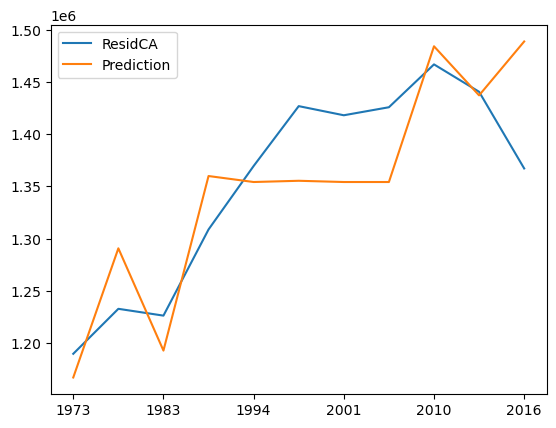

In [68]:
y_test.plot()

In [69]:
y_test['Difference'] = y_test['ResidCA'] - y_test['Prediction']
y_test['% Difference'] = y_test['Difference'] / y_test['ResidCA'] * 100
y_test

,ResidCA,Prediction,Difference,% Difference
1973,1189801,1167142,22659,1.904436
1982,1232826,1290698,-57872,-4.694255
1983,1226313,1192869,33444,2.727199
1987,1308727,1359856,-51129,-3.906774
1994,1369438,1354131,15307,1.117758
2000,1426721,1355310,71411,5.005253
2001,1417985,1354131,63854,4.503151
2002,1425659,1354131,71528,5.017189
2010,1466657,1483981,-17324,-1.181190
2013,1440463,1437024,3439,0.238743


In [70]:
within5, totalRows = 0, 0
for index, row in y_test.iterrows():
    if row['% Difference'] >= -5 and row['% Difference'] <= 5:
        within5 += 1
    totalRows += 1
accuracy = within5/int(totalRows)
print("Accuracy (5%):" + str(accuracy))

Accuracy (5%):0.7272727272727273
